In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/hospital-charges.csv')
pd.set_option('display.max_columns',100)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [83]:
df.shape

(163065, 12)

In [84]:
df.size

1956780

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [86]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [87]:
df.isna().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [88]:
df.corr()

,Provider Id,Provider Zip Code,Total Discharges
Provider Id,1.000000,-0.160237,0.000456
Provider Zip Code,-0.160237,1.000000,-0.071804
Total Discharges,0.000456,-0.071804,1.000000


<AxesSubplot:>

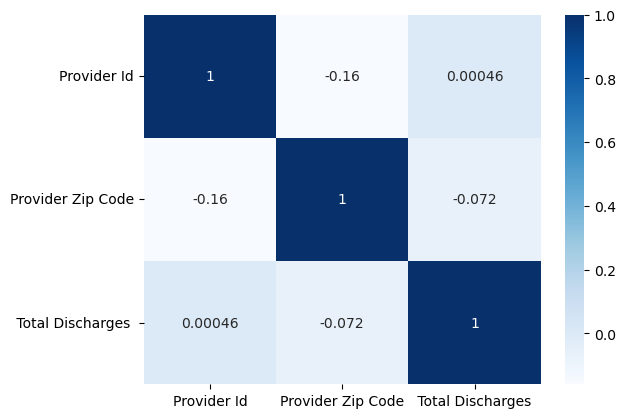

In [89]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [90]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [91]:
#Getting the unique values
for feature in df.columns:
    print('{} features has {} no: of unique values'.format(feature,df[feature].nunique()))

DRG Definition features has 100 no: of unique values
Provider Id features has 3337 no: of unique values
Provider Name features has 3201 no: of unique values
Provider Street Address features has 3326 no: of unique values
Provider City features has 1977 no: of unique values
Provider State features has 51 no: of unique values
Provider Zip Code features has 3053 no: of unique values
Hospital Referral Region Description features has 306 no: of unique values
 Total Discharges  features has 642 no: of unique values
 Average Covered Charges  features has 160236 no: of unique values
 Average Total Payments  features has 147842 no: of unique values
Average Medicare Payments features has 150328 no: of unique values


In [92]:
#Dropping the $ values to float
df[df.columns[8:]]=df[df.columns[8:]].replace('[\$,]','',regex=True).astype(float)

In [93]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14.0,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24.0,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25.0,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18.0,31633.27,5658.33,4851.44


In [94]:
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                       float64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

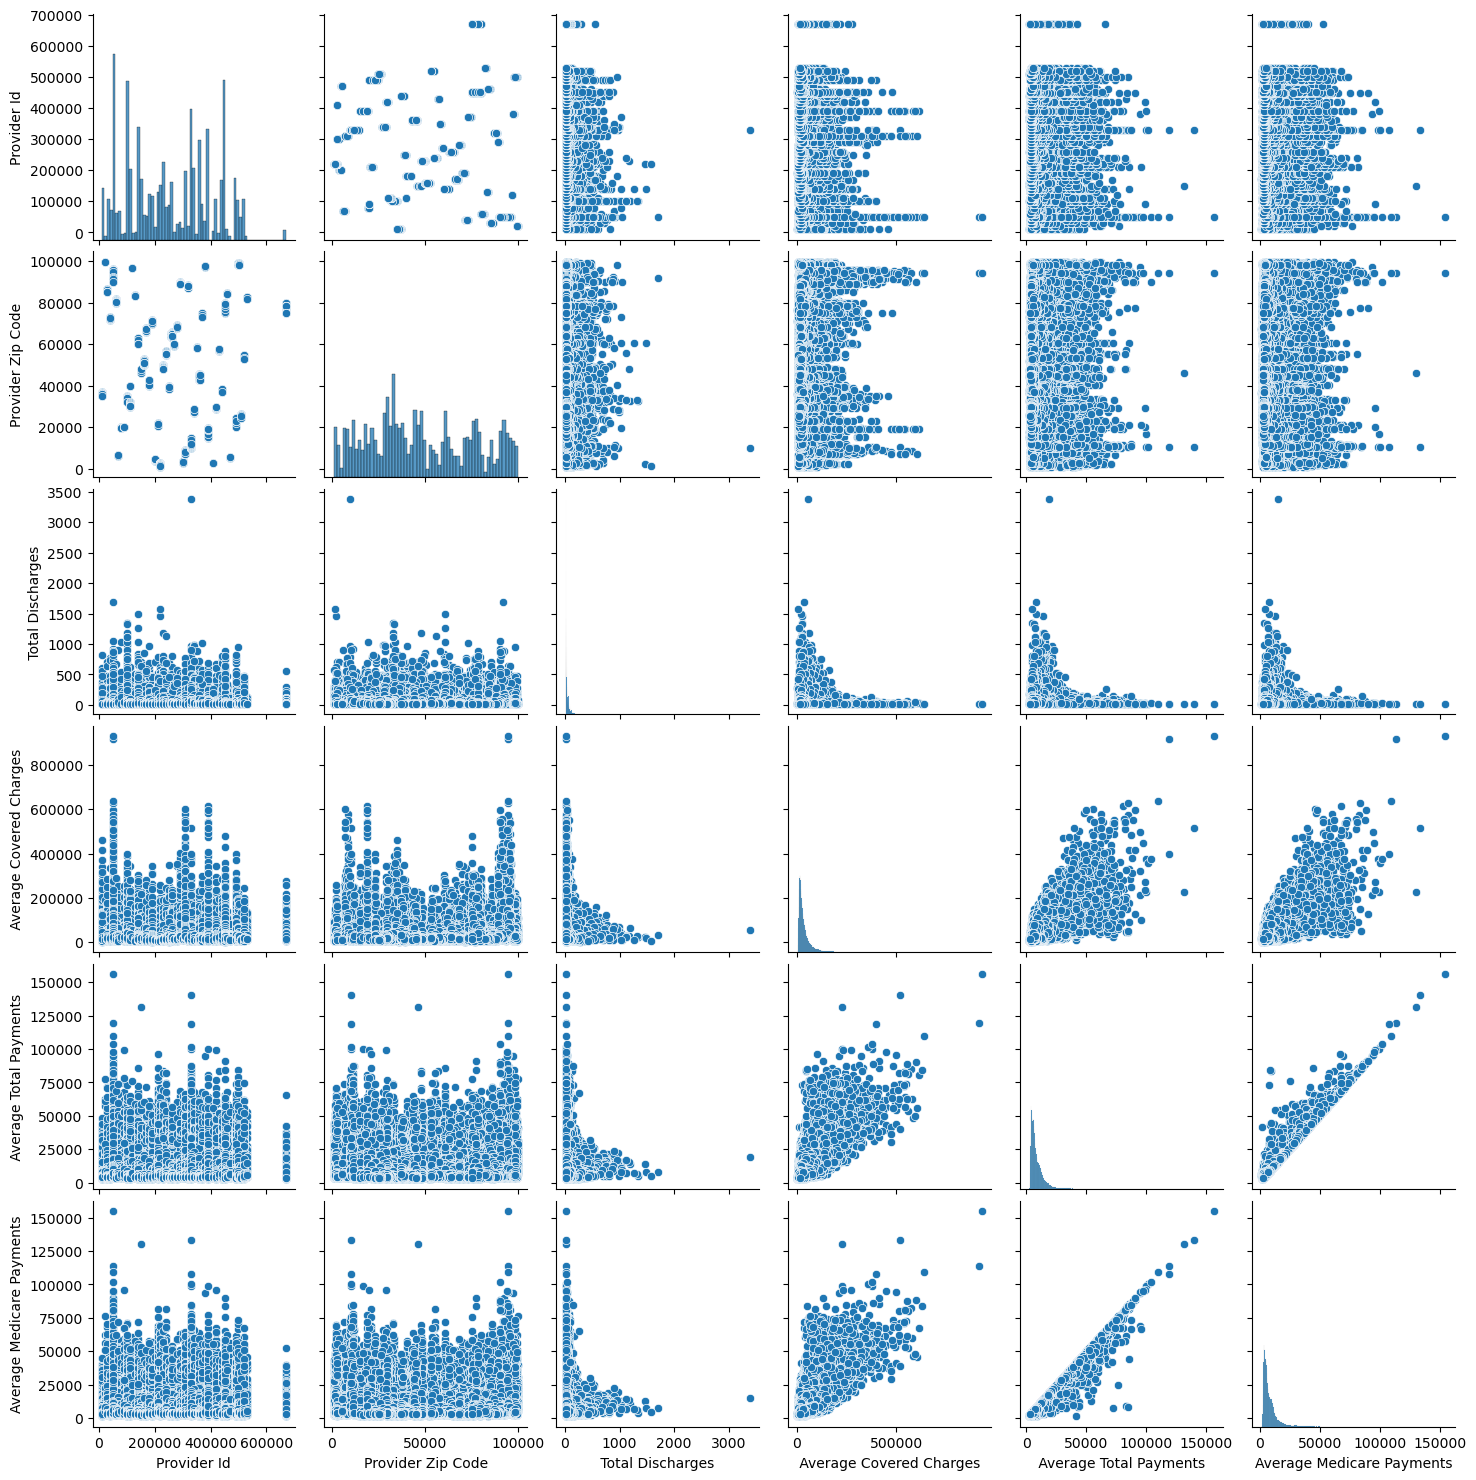

In [95]:
sns.pairplot(data=df)

Text(0, 0.5, 'Total discharge')

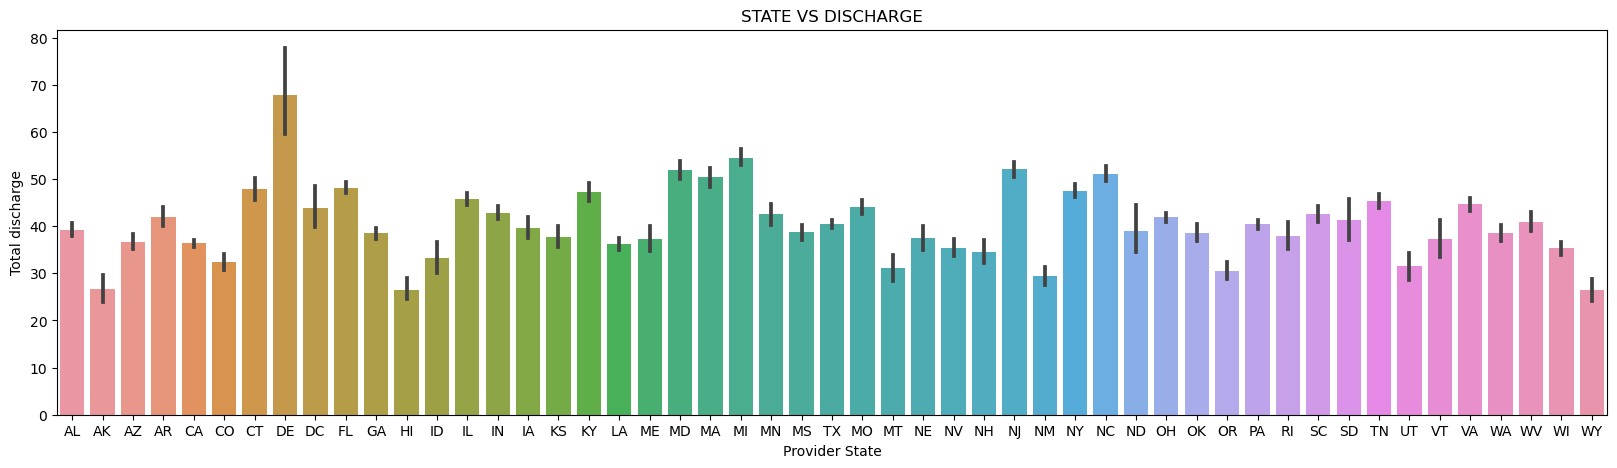

In [96]:
#State which has most discharge
plt.figure(figsize=(20,5))
plt.title('STATE VS DISCHARGE')
sns.color_palette('rocket',as_cmap=True)
sns.barplot(y=' Total Discharges ',x='Provider State',data=df)
plt.xlabel('Provider State')
plt.ylabel('Total discharge')

[Text(0.5, 1.0, 'Top States with most Medicare payment')]

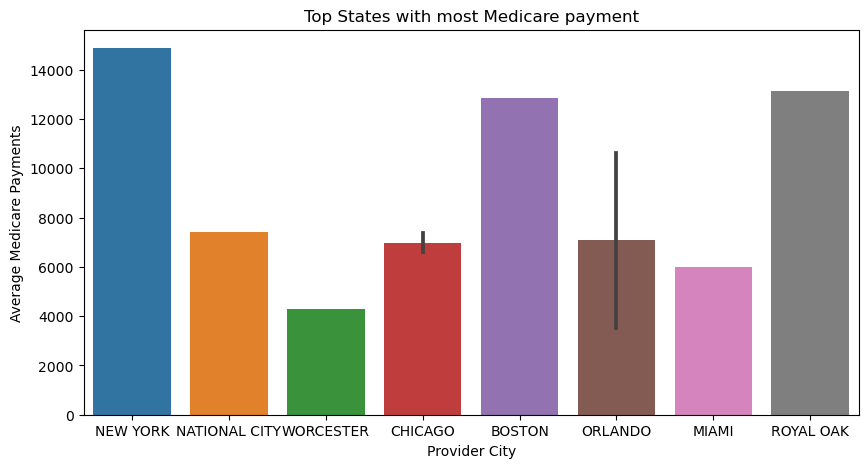

In [97]:
#State which has most Medicare payments
plt.figure(figsize=(10,5))
most=df.sort_values(' Total Discharges ',ascending=False).head(10)
sns.barplot(y='Average Medicare Payments',x='Provider City',data=most).set(title='Top States with most Medicare payment')

# Prediction based on KNN & Naive_bayes classification

In [98]:
df['target'] = [1 if x <=30 else 2 if x <=60 else 3 if x <=100 else 4 for x in df[' Total Discharges ']]

In [99]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,target
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.07,5777.24,4763.73,3
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14.0,15131.85,5787.57,4976.71,1
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24.0,37560.37,5434.95,4453.79,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25.0,13998.28,5417.56,4129.16,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18.0,31633.27,5658.33,4851.44,1


In [100]:
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                       float64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
target                                    int64
dtype: object

In [101]:
x=df.iloc[:,-5:-1].values
x

array([[9.100000e+01, 3.296307e+04, 5.777240e+03, 4.763730e+03],
       [1.400000e+01, 1.513185e+04, 5.787570e+03, 4.976710e+03],
       [2.400000e+01, 3.756037e+04, 5.434950e+03, 4.453790e+03],
       ...,
       [1.900000e+01, 3.912173e+04, 5.704360e+03, 4.058360e+03],
       [1.100000e+01, 2.887309e+04, 7.663090e+03, 6.848540e+03],
       [1.200000e+01, 1.504200e+04, 3.539750e+03, 2.887410e+03]])

In [102]:
y=df.iloc[:,-1].values
y

array([3, 1, 1, ..., 1, 1, 1], dtype=int64)

# KNN Classification model

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[1.100000e+01, 2.378200e+04, 8.596630e+03, 7.467540e+03],
       [2.100000e+01, 3.180338e+04, 7.449380e+03, 6.751660e+03],
       [1.400000e+01, 1.806707e+04, 3.616000e+03, 2.576280e+03],
       ...,
       [4.600000e+01, 7.846020e+03, 7.399760e+03, 6.415910e+03],
       [7.000000e+01, 2.656530e+04, 4.157740e+03, 3.277610e+03],
       [2.100000e+01, 2.900480e+04, 1.375738e+04, 1.308509e+04]])

In [104]:
x_test

array([[1.100000e+01, 3.104681e+04, 8.254810e+03, 7.537360e+03],
       [7.900000e+01, 9.609890e+03, 9.061580e+03, 8.043640e+03],
       [1.500000e+01, 1.520053e+04, 5.396930e+03, 4.648660e+03],
       ...,
       [1.700000e+01, 2.294100e+04, 2.700711e+04, 2.647817e+04],
       [2.250000e+02, 8.616493e+04, 1.911910e+04, 1.503602e+04],
       [1.300000e+01, 1.347169e+04, 4.747530e+03, 3.794610e+03]])

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-0.62668618, -0.35323858, -0.14607107, -0.1417716 ],
       [-0.42914998, -0.12339908, -0.29595955, -0.23974178],
       [-0.56742532, -0.51699054, -0.79679155, -0.81115418],
       ...,
       [ 0.06469053, -0.80985798, -0.30244242, -0.2856901 ],
       [ 0.53877742, -0.27348768, -0.72601309, -0.71517521],
       [-0.42914998, -0.2035878 ,  0.52818213,  0.62700578]])

In [106]:
x_test

array([[-0.6109459 , -0.145087  , -0.1867401 , -0.1279801 ],
       [ 0.69155919, -0.74983001, -0.08181841, -0.05876718],
       [-0.53432795, -0.5921161 , -0.55841184, -0.52289074],
       ...,
       [-0.49601898, -0.37375474,  2.25202568,  2.46139485],
       [ 3.48811424,  1.40981445,  1.22617771,  0.89715253],
       [-0.57263692, -0.64088729, -0.64286732, -0.63964687]])

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 3, 1, ..., 1, 4, 1], dtype=int64)

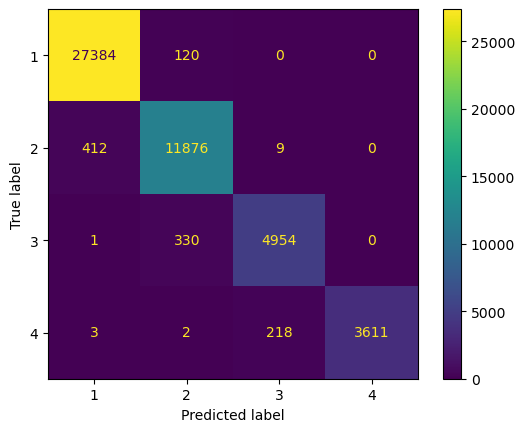

In [108]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
kcmr=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(kcmr,display_labels=['1','2','3','4'])
cmd.plot()

In [109]:
score=accuracy_score(y_test,y_pred)
score

0.9776165167620605

In [110]:
a=[]
for i in range(1,50):
    kclassifier=KNeighborsClassifier(n_neighbors=i)
    kclassifier.fit(x_train,y_train)
    y_pred=kclassifier.predict(x_test)
    a.append(accuracy_score(y_test,y_pred))
print(a)

[0.9774529844644317, 0.9727514309076043, 0.978659035159444, 0.9762264922322159, 0.9795993458708094, 0.9775347506132461, 0.9802330335241211, 0.9776165167620605, 0.9804578904333606, 0.9778209321340965, 0.9802125919869175, 0.978250204415372, 0.9799468520032707, 0.9783728536385936, 0.9794766966475879, 0.9781071136549468, 0.9797833197056419, 0.9779026982829109, 0.9793540474243663, 0.9782910874897792, 0.9790474243663123, 0.9782706459525756, 0.9790065412919051, 0.9780253475061325, 0.9789860997547015, 0.9777800490596893, 0.9788225674570727, 0.9773507767784138, 0.9782910874897792, 0.9770645952575634, 0.9779435813573181, 0.9769010629599346, 0.9779640228945217, 0.976676206050695, 0.9775756336876533, 0.9763900245298447, 0.9772281275551922, 0.9764717906786591, 0.9770441537203598, 0.9760425183973834, 0.9768601798855274, 0.9760016353229762, 0.9770237121831562, 0.9760220768601798, 0.9767375306623058, 0.9756132461161079, 0.9761856091578087, 0.9750408830744072, 0.9759403107113654]


In [111]:
kclr=classification_report(y_test,y_pred)
print(kclr)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     27504
           2       0.96      0.96      0.96     12297
           3       0.95      0.93      0.94      5285
           4       1.00      0.94      0.97      3834

    accuracy                           0.98     48920
   macro avg       0.98      0.96      0.97     48920
weighted avg       0.98      0.98      0.98     48920



# Naive_Bayes Model Classification

In [112]:
from sklearn.naive_bayes import GaussianNB
nb_class=GaussianNB()
nb_class.fit(x_train,y_train)

GaussianNB()

In [113]:
y_pred=nb_class.predict(x_test)
y_pred

array([1, 3, 1, ..., 1, 4, 1], dtype=int64)

In [114]:
nb_score=accuracy_score(y_test,y_pred)
nb_score

0.9696034341782502

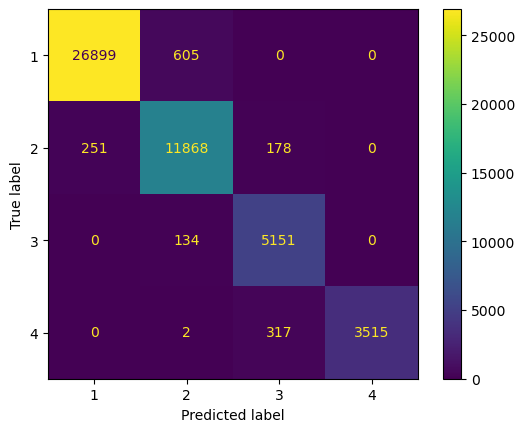

In [115]:
ncmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['1','2','3','4'])
ncmd.plot()

In [116]:
nclr=classification_report(y_test,y_pred)
print(nclr)

              precision    recall  f1-score   support

           1       0.99      0.98      0.98     27504
           2       0.94      0.97      0.95     12297
           3       0.91      0.97      0.94      5285
           4       1.00      0.92      0.96      3834

    accuracy                           0.97     48920
   macro avg       0.96      0.96      0.96     48920
weighted avg       0.97      0.97      0.97     48920

